In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(stringr))
library(grid)
library('ggh4x')
library("cowplot")
library(patchwork)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [2]:
is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  
  if(luminance < 128){
  
  return('white')
      
  }else{return('black')}
}

# Read color hex code for cell types

In [3]:
color_annotation<-read.csv('/home/jupyter/BRI_Figures_Final_V2/Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

# Read CompositeScore

In [4]:
df<-read.csv('04_CompositeScore/BRI_CompositeScore_Down.csv')

# Plotting

In [5]:
celltype_order<-c("Core naive CD8 T cell","CM CD8 T cell","GZMK+ CD27+ EM CD8 T cell","Naive CD4 Treg",
                 "Core naive CD4 T cell","CM CD4 T cell","GZMB- CD27- EM CD4 T cell","GZMB- CD27+ EM CD4 T cell")
df$celltype<-factor(df$celltype,levels=celltype_order)

In [6]:
df$`Age Group`=df$`AgeGroup`
df$`Age Group`=factor(df$`Age Group`,level=c('Young','Older'))


In [7]:
plot_list<-list()
for (selected_celltype in celltype_order){
df_sub <- df %>% filter(celltype == selected_celltype)

p1 <- ggplot(df_sub, aes(sample.daysSinceFirstVisit, composite_score_sum_scaled_mean, color = AgeGroup)) +
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, 
              alpha=0.5,
              linetype =1)+
  ylab('') +
  theme_bw(base_size = 8) +
  theme(
    axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()
  ) + 
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  geom_smooth(method = "lm", se = TRUE, linewidth = 0.3) +
  facet_wrap2(~celltype, axes = "all", remove_labels = "all", ncol = 1, scale = 'free_y') +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_rect(fill = adjustcolor(color_vector[selected_celltype], alpha.f = 0.8), color = NA),
    strip.text = element_text(color = is_dark_color(adjustcolor(color_vector[selected_celltype], alpha.f = 0.8)))
  ) +
  xlab('') +
  theme(legend.position = "none")

p2 <- ggplot(df_sub, aes(composite_score_sum_scaled_mean, fill = `Age Group`, color = `Age Group`)) +
  geom_density(alpha = 0.5, linewidth = 0.5) +
  scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  coord_flip() +
  theme_void(base_size = 8) +
  theme(legend.position = "none") +
  theme(plot.margin = margin(0, 0, 0, -1, "mm"))

combined_plot <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
plot_list[[selected_celltype]]<-combined_plot
}



`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


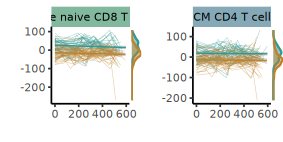

In [8]:
options(repr.plot.width = 60/25.4, repr.plot.height = 30/25.4)

p<-plot_grid(plot_list[[1]],plot_list[[6]], 
             ncol = 2, rel_widths = c(10, 10), align = 'h', axis = 'tb')
p
ggsave('FigureH.pdf',p,width = 62/25.4,height = 30/25.4)